## Importing Libraries

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the MSE Error
def MSE(y_true, y_pred):
    return np.mean(np.power((y_true - y_pred), 2))

### A Generic Layer class

In [2]:
class Layer:
    def __init__(self):
        self.W = []
        self.b = []

    def forward(self, X):
        raise NotImplementedError

    def backward(self, output_error, learning_rate):
        raise NotImplementedError

### Implementation of different Layers

In [3]:
class Linear(Layer):
    def __init__(self, input_size, output_size):
        super().__init__()

        np.random.seed(0)
        self.W = np.random.randn(input_size, output_size)
        self.b = np.zeros((1, output_size))

    def forward(self, X):
        self.X = X
        out = np.dot(X, self.W) + self.b
        return out

    def backward(self, output_error, learning_rate):
        dx = np.dot(output_error, self.W.T)
        dW = np.dot(self.X.T, output_error)
        db = np.sum(output_error, axis=0, keepdims=True)

        self.W -= learning_rate * dW
        self.b -= learning_rate * db
        return dx

In [4]:
class Sigmoid(Layer):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        self.out = 1.0 / (1.0 + np.exp(-X))
        return self.out

    def backward(self, output_error, learning_rate):
        sigmoid_grad = self.out * (1.0 - self.out)
        input_error = output_error * sigmoid_grad
        return input_error

In [5]:
class Tanh(Layer):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        self.out = np.tanh(X)
        return self.out

    def backward(self, output_error, learning_rate):
        tanh_grad = 1.0 - np.square(self.out)
        input_error = tanh_grad * output_error
        return input_error

In [6]:
class Softmax(Layer):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        self.X = X
        shifted_input = X - np.max(X, axis=1, keepdims=True)
        exp_input = np.exp(shifted_input)
        self.output = exp_input / np.sum(exp_input, axis=1, keepdims=True)
        return self.output

    def backward(self, output_error, learning_rate):
        grad = self.output * (1 - self.output) - sum([self.output * self.output])
        return  grad * output_error

In [7]:
class Sequential(Layer):
    def __init__(self, layers=None):
        self.training_loss = []
        if layers is None:
            self.layers = []
        else:
            self.layers = layers

    def add(self, layer):
        self.layers.append(layer)

    def loss(self, y_true, y_pred):
        return 2*(y_pred-y_true)/y_true.size

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, output_error, learning_rate):
        for layer in reversed(self.layers):
            output_error = layer.backward(output_error, learning_rate)
        return output_error

    def fit(self, X, Y, epochs, learning_rate):
        for _ in range(epochs):
            output = self.forward(X)
            output_err = self.loss(Y, output)
            self.training_loss.append(MSE(Y, output))
            self.backward(output_err, learning_rate)

    def predict(self, X):
        out = self.forward(X)
        return out

    def plot(self):
        plt.plot(self.training_loss)
        plt.xlabel("Epocs")
        plt.ylabel("Training Loss")
        plt.title("Training Loss vs epochs")
        plt.show()

    def save_weights(self, filename):
        weights = []
        for layer in self.layers:
            weights.append(layer.W)
            weights.append(layer.b)

        with open(filename, 'wb') as f:
            pickle.dump(weights, f)

    def load_weights(self, filename):
        with open(filename, 'rb') as f:
            weights = pickle.load(f)

        index = 0
        for layer in self.layers:
            layer.W = weights[index]
            index = index + 1
            layer.b = weights[index]
            index = index + 1


# Demo of Sequential Neural Network on 'XOR problem'

###  Creating simple XOR dataset to test on XOR-Operation

In [8]:
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

Y_train = np.array([
    [0],
    [1],
    [1],
    [0]
])

X_test = [[0, 1]]
Y_test = [[1]]

### Linear-Sigmoid Model

The MSE Error of the Model(on Train Dataset): 0.25484637210628197
The MSE Error of the Model(on Test Dataset): 0.2926875526727247


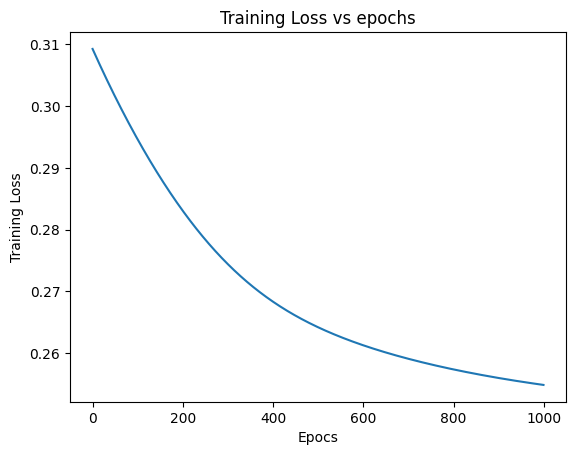

In [9]:
def LinearSigmoidModel(x_train, y_train, x_test, y_test, epochs, learning_rate):
    model = Sequential()

    # Add 1 hidden layer with sigmoid as activation function
    model.add(Linear(2, 1))
    model.add(Sigmoid())

    # training the model
    model.fit(x_train, y_train, epochs, learning_rate)

    # MSE of train dataset
    y_train_pred = model.predict(x_train)
    mse_error_train = MSE(y_train, y_train_pred)
    print(f"The MSE Error of the Model(on Train Dataset): {mse_error_train}")

    # MSE of test dataset
    y_test_pred = model.predict(x_test)
    mse_error_test = MSE(y_test, y_test_pred)
    print(f"The MSE Error of the Model(on Test Dataset): {mse_error_test}")

    # save weights
    model.save_weights("Dump/linear_sigmoid.sav")
    
    # plotting the Training loss vs epochs 
    model.plot()

LinearSigmoidModel(X_train, Y_train, X_test, Y_test, epochs=1000, learning_rate=0.05)

### Linear-Tanh Model

The MSE Error of the Model(on Train Dataset): 0.25172080701898536
The MSE Error of the Model(on Test Dataset): 0.009229549034951635


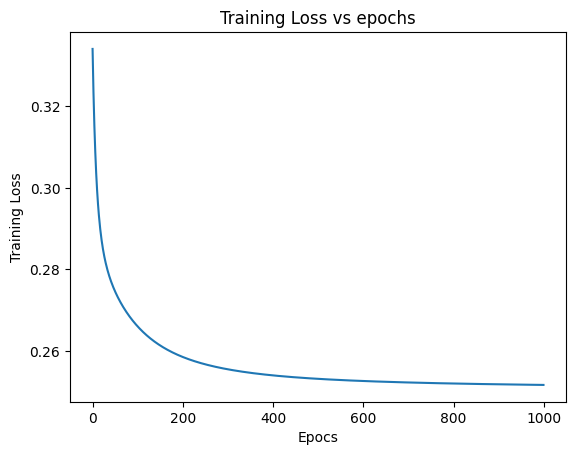

In [10]:
def LinearTanhModel(x_train, y_train, x_test, y_test, epochs, learning_rate):
    model = Sequential()

    # Add 1 hidden layer with sigmoid as activation function
    model.add(Linear(2, 1))
    model.add(Tanh())

    # training the model
    model.fit(x_train, y_train, epochs, learning_rate)

    # MSE of train dataset
    y_train_pred = model.predict(x_train)
    mse_error_train = MSE(y_train, y_train_pred)
    print(f"The MSE Error of the Model(on Train Dataset): {mse_error_train}")

    # MSE of test dataset
    y_test_pred = model.predict(x_test)
    mse_error_test = MSE(y_test, y_test_pred)
    print(f"The MSE Error of the Model(on Test Dataset): {mse_error_test}")

    # save weights
    model.save_weights("Dump/linear_tanh.sav")
    
    # plotting the Training loss vs epochs
    model.plot()
    
LinearTanhModel(X_train, Y_train, X_test, Y_test, epochs=1000, learning_rate=0.05)

### Loading any previously saved Model

In [11]:
def run_previous_saved_model(x_train, y_train, x_test, y_test, epochs, learning_rate):
    model = Sequential()

    # Add 1 hidden layer with sigmoid as activation function
    model.add(Linear(2, 1))
    model.add(Sigmoid())

    ########## No need to train model ###########
    # use saved model weights
    model.load_weights("Dump/linear_sigmoid.sav")

    # MSE of train dataset
    y_train_pred = model.predict(x_train)
    mse_error_train = MSE(y_train, y_train_pred)
    print(f"The MSE Error of the Model(on Train Dataset): {mse_error_train}")

    # MSE of test dataset
    y_test_pred = model.predict(x_test)
    mse_error_test = MSE(y_test, y_test_pred)
    print(f"The MSE Error of the Model(on Test Dataset): {mse_error_test}")


run_previous_saved_model(X_train, Y_train, X_test, Y_test, epochs=1000, learning_rate=0.05)

The MSE Error of the Model(on Train Dataset): 0.25484637210628197
The MSE Error of the Model(on Test Dataset): 0.2926875526727247
